## 1. 전처리(Preprocessing)

### Tokenizer() : 토큰화와 정수 인코딩(단어에 대한 인덱싱)을 위해 사용한다.

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts([fit_text]) # fit_on_texts에 코퍼스를 입력하면 빈도수를 기준으로 단어 집합을 생성한다.

In [2]:
test_text = "The earth is an awesome place live"
sequences = t.texts_to_sequences([test_text])[0]

print("sequences :", sequences) 
print("word_index :",t.word_index) # great는 단어 집합에 없으므로 출력되지 않는다. awesome :5만 존재

sequences : [1, 2, 3, 4, 5, 6, 7]
word_index : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


### pad_sequence() :
- 전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있다. 모델의 입력을 사용하려면 모든 샘플의 길이를 동일하게 맞춰야 할 때가 있는데(**Padding**), 보통 숫자 0을 넣어서 길이를 맞춘다.

#### maxlen
- 모든 데이터에 대해 정규화할 길이

#### padding
- 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1,2,3],[3,4,5,6],[7,8]], maxlen = 3, padding = 'pre') 

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

## 워드 임베딩(Word Embedding)

- 간단하게 말해 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말함

- 원-핫 벡터가 대부분이 0의 값을 가지고 단 하나의 1의 값을 가지면서 벡터의 차원이 대체적으로 크다는 성질을 가졌다.
> ex) [0 1 0 0 0 0 0 ..... 0 0 0 0] # 차원이 굉장히 크면서 대부분의 값이 0

대부분의 값이 0인 이러한 벡터를 **희소 벡터(sparse vector)**이라고 하며, 원-핫 벡터는 희소 벡터의 예이다.

원-학 벡터는 단어의 수만큼 벡터의 차원을 가지며 단어 간 유사도가 모두 동일하다는 단점이 있다.

반면, 희소 벡터와 표기상으로도 의미상으로도 반대인 벡터가 있다. 대부분의 값이 실수이고, 상대적으로 저차원인 **밀집 벡터(dense vector)**이다
> ex) [0.1 -1.2 0.2 1.8] # 상대적으로 저차원이며 실수값을 가짐

|-|<center>원-핫 벡터<center>|<center>임베딩 벡터<center>|
|---|---|---|
|<center>차원<center>|<center>고차원(단어 집합의 크기)<center>|<center>저차원<center>|
|<center>다른 표현<center>|<center>희소 벡터의 일종<center>|<center>밀집 벡터의 일종<center>|
|<center>표현방법<center>|<center>수동<center>|<center>훈련 데이터로부터 학습함<center>|
|<center>값의 타입|<center>1과 0<center>|<center>실수<center>|

단어를 원-핫 벡터로 만드는 과정을 **원-핫 인코딩**이라고 함

이와 대비하여 단어를 밀집 벡터로 만드는 작업을 **워드 임베딩(word embedding)**이라고 한다.

밀집 벡터는 워드 임베딩 과정을 통해 나온 결과이므로 임베딩 벡터(embedding vector)라고도 부른다.

원-핫 벡터의 차원이 주로 20000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256,512, 1024등의 차원을 가진다.

임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경된다.

In [4]:
# 2개의 문장 단어 토큰화
from nltk.tokenize import word_tokenize

corpus1 = 'Hope to see you soon'
corpus2 = 'Nice to see you again'

In [5]:
text1 = [word_tokenize(corpus1),word_tokenize(corpus2)]

In [6]:
text1

[['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

In [7]:
# 각 단어에 대한 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(text1)

print(t.word_index)

t.texts_to_sequences(text1)

{'to': 1, 'see': 2, 'you': 3, 'hope': 4, 'soon': 5, 'nice': 6, 'again': 7}


[[4, 1, 2, 3, 5], [6, 1, 2, 3, 7]]

### Embedding() :

**Embedding()**은 단어를 밀집 벡터로 만드는 역할을 한다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 한다.

먼저 **(number of samples, input_length)인 2D 정수 텐서**를 입력받는다. 
이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스를 의미한다. Embedding()은 워드 임베딩 작업을 수행하고 **(number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴**한다.

In [8]:
from tensorflow.keras.layers import Embedding

In [9]:
# 위 데이터가 아래의 임베딩 층의 입력이 된다.
Embedding(7,2, input_length = 5)
# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다.


각 정수는 아래의 테이블의 인덱스로 사용되며 Embeddig()은 각 단어에 대해 임베딩 벡터를 리턴한다.

|   index    | embedding  |
|------------|------------|
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |

이때 위의 표는 임베딩 벡터가 된 결과를 예로 정리한 것이기에 Embedding()의 출력인 3D 텐서를 보여주는 것은 아니다.

## 2. 다층 퍼셉트론(MultiLayer Perceptron, MLP)로 텍스트 분류하기

- 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망을 **다층 퍼셉트론(MLP)**라고 한다.

다층 퍼셉트론은 **피드 포워드 신경망(Feed Forward Neural Network, FFNN)**의 가장 기본적인 형태며 피드 포워드 신경망은 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말한다.


## 2-1. 케라스의 texts_to_matrix() 이해하기

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
texts = ['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나',' 저는 과일이 좋아요']

In [12]:
# 텍스트 데이터 정수 인코딩 수행
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


입력된 텍스트 데이터로부터 행렬을 만들고자 할 때는 **texts_to_matrix()**를 사용한다. 

texts_to_matrix()는 총 4개의 모드를 지원하는데 각 모드는 'binary', 'count', 'freq', 'tfidf'로 총 4개이다.

In [13]:
# 'count' 사용
print(t.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


count를 사용할 경우 **문서 단어 행렬(Document-Term Matrix, DTM)**을 생성한다.

DTM의 인덱스는 앞서 확인한 word_index의 결과이다.
이때, 주의할 점은 **각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작한다**. 
> 실제로 단어의 개수는 9개였지만 완성된 행렬의 열 개수는 10개이며
>
> 첫번째 열은 그 어떤 단어도 할당되지 않았기 때문에 모든 행에서 값이 0인 것을 볼 수 있다.

3번째 행에서는 {바나나:1}이 2번 등장했기 때문에 첫번째 열의 값은 2가 나온 것을 볼 수 있다.

DTM은 bag of words를 기반으로 하므로 단어 순서 정보는 보존되지 않는다.

In [14]:
# mode = 'binary'사용
print(t.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


DTM과 매우 유사해보이는 결과, 그러나 count와 달리 3번째 행의 첫번째 열의 값은 2가 아닌 1이 나왔다

binary이기 때문에 해당 단어가 몇 개였는지는 무시하고 **존재하면 1, 아니면 0**의 값을 가지기 때문이다.

In [15]:
# mode = 'tfidf'
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2))

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


tfidf는 말그대로 TF-IDF 행렬을 만든다.

In [16]:
# mode= 'freq'
print(t.texts_to_matrix(texts, mode = 'freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


'freq'모드는 **각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총합)를 분모로 하는 표현 방법**이다.

3번째 행을 예로들면 '길고 노란 바나나 바나나'에서 문서의 크기는 4인데 바나나는 총 2회 등장한다. 이에 따라 세번째 문장에서의 단어 **'바나나'**의 값은 위의 행렬에서 2/4 = 0.5가 된다.

남은 **'길고'**, **'노란'**이라는 두 단어는 각 1회 등장하므로 각자 1/4의 값인 0.25를 가진다.

## 3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [17]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

fetch_20newsgroups : 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공한다.

In [18]:
newsdata = fetch_20newsgroups(subset= 'train') # 'train'을 기재하면 훈련 데이터만 리턴된다.

In [19]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [20]:
print("훈련용 샘플의 개수 : {}".format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [21]:
print("총 주제의 개수 : {}".format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 실습을 해보고자 한다.

레이블인 target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 주제인지 확인해보자.

In [22]:
print("첫번째 샘플의 레이블 : {}".format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [23]:
print("7번 레이블이 의미하는 주제 : {}".format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [24]:
# 첫번째 이메일의 내용 출력
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [25]:
# 메일본문 data와 레이블인 target을 데이터프레임으로 만들어서 데이터에 대한 통계적인 정보 출력
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [27]:
# null값 유무 확인
data.isnull().values.any()

False

In [28]:
# nunique를 통해 샘플 중 중복을 제거한 개수를 확인할 수 있다.
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


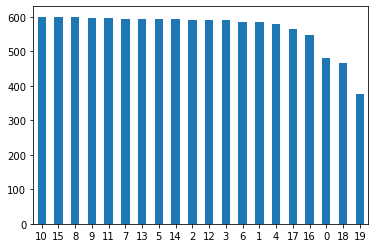

In [29]:
data['target'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

10번 레이블의 수가 가장 많고, 19번 레이블의 수가 가장 적으며 대체적으로 400~600개 사이의 분포를 보인다.

In [30]:
newsdata_test = fetch_20newsgroups(subset = 'test', shuffle = True) # test를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터만 본문 저장 
train_label = data['target'] # 훈련 데이터에 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장 
test_label = newsdata_test.target # 테스트 데이터의 라벨 저장

In [31]:
max_words = 10000 # 학습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [32]:
def prepare_data(train_data, test_data, mode) : # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어를 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode = mode) # 샘플 수 x max_words 크기의 행렬 생성, 모드는 사용자가 정의
    X_test = t.texts_to_matrix(test_data, mode = mode) # 샘플 수 x max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [33]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes) # 원핫인코딩
y_test = to_categorical(test_label, num_classes) # 원핫인코딩

In [34]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


훈련 샘플은 총 11314개 x 10000 이때, 열이 10000인 이유는 max_words(10000개)를 num_words로 지정했기 때문이다. 단어의 정수 인덱스는 1, 행렬 인덱스는 0부터 시작이므로 사실상 9999개 단어를 사용했다고 볼 수 있다.

In [35]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


## 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [36]:
# 모델 설계에 필요한 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [42]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

설계한 신경망은 총 4개의 층을 가지고 있다.

> **max_words(10000)의 크기를 가진 입력층**

> **256개의 뉴련을 가진 첫번째 은닉층**

> **128개의 뉴런을 가진 두번째 은닉층**

> **num_classes(20)의 크기를 가진 출력층**

이번에 설계한 다층 퍼셉트론은 은닉층이 2개이므로 깊은 신경망(Deep Neural Network, DNN)이다.


In [43]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 32ms/step - loss: 2.3535 - accuracy: 0.3178 - val_loss: 1.0226 - val_accuracy: 0.8242
Epoch 2/5
80/80 [==============================] - 2s 28ms/step - loss: 0.9053 - accuracy: 0.7496 - val_loss: 0.4641 - val_accuracy: 0.8905
Epoch 3/5
80/80 [==============================] - 2s 27ms/step - loss: 0.4530 - accuracy: 0.8790 - val_loss: 0.3501 - val_accuracy: 0.8975
Epoch 4/5
80/80 [==============================] - 2s 27ms/step - loss: 0.2626 - accuracy: 0.9323 - val_loss: 0.3100 - val_accuracy: 0.9117
Epoch 5/5
80/80 [==============================] - 2s 26ms/step - loss: 0.1710 - accuracy: 0.9586 - val_loss: 0.2954 - val_accuracy: 0.9152
binary 모드의 테스트 정확도: 0.8308550119400024
Epoch 1/5
80/80 [==============================] - 3s 29ms/step - loss: 2.6782 - accuracy: 0.2628 - val_loss: 1.5126 - val_accuracy: 0.7588
Epoch 2/5
80/80 [==============================] - 2s 26ms/step - loss: 1.3514 - accuracy: 0.6432 - val_loss: 0.6865 - va

'freq'의 정확도가 혼자 0.67을 웃돌았다. 적절한 전처리가 아니었다.